# <b>Lab 3</b>: Clustering Analysis using KMEANS, DBSCAN. and GMM


# <font color='blue'>Student Exam Scores Extended Dataset</font>   


<img src="MSDS.png" alt="Logo Picture"><img src="students.jpg" alt="Logo Picture" width = 300 height = 300>

### <b> Team Members: </b> Joey Hernandez, Daniel Chang, and Vo Nguyen

### <b> Contributions: </b>
- Cluster Analysis: **Vo Nguyen**
- []: **Joey Hernandez**
- []: **Danny Chang**

### <b>Table of Contents</b>
<a class="anchor" id="toc"></a>
* **[Data Preprocessing](#data)**
    * [Import Packages](#import)
    * [Loading the Data](#load)
    * [Numeric Dataframe for Clustering](#cluster)
* **[Business Understanding](#understand)**
* **[Data Understanding](#data)**
* **[Model and Evaluation: Cluster Analysis](#ca)**
    * [KMeans](#kmeans)
    * [DBSCAN](#dbscan)
    * [Gaussian Mixture Models](#gmm)
* **[Exceptional Work](#ew)**
* **[Conclusion](#conclusion)**

## Data Preprocessing

### Import Packages [↑](#toc)
<a class="anchor" id="import"></a>

In [6]:
# getting things started
%matplotlib inline

import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_samples

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV

### Loading the Data [↑](#toc)
<a class="anchor" id="load"></a>

In [7]:
df = pd.read_csv('cleandf.csv')
display(df)

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,MathResult,ReadingResult,WritingResult
0,female,group C,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74,Pass,Pass,Pass
1,female,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,69,90,88,Fail,Pass,Pass
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91,Pass,Pass,Pass
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,school_bus,5 - 10,45,56,42,Fail,Fail,Fail
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75,Pass,Pass,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30636,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65,Fail,Fail,Fail
30637,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51,Fail,Fail,Fail
30638,female,group C,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67,Fail,Pass,Fail
30639,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93,Pass,Pass,Pass


### Numeric Dataframe for Clustering [↑](#toc)
<a class="anchor" id="num"></a>

In [17]:
num_df = df[["MathScore","ReadingScore","WritingScore"]]

In [19]:
num_df.head()


,MathScore,ReadingScore,WritingScore
0,71,71,74
1,69,90,88
2,87,93,91
3,45,56,42
4,76,78,75


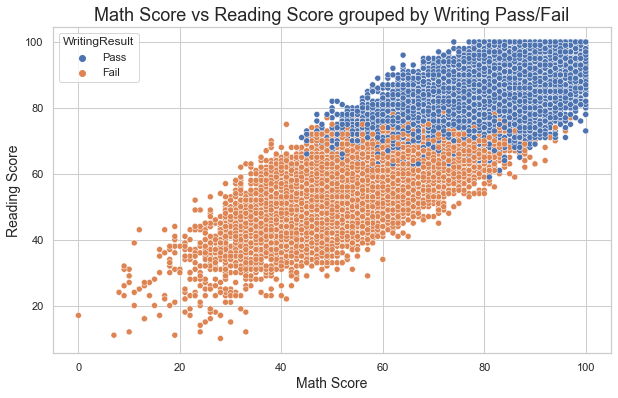

In [109]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming math_read_df is your DataFrame and it has columns "MathScore" and "ReadingScore"

plt.figure(figsize=(10, 6))  # Set the size of the plot
sns.scatterplot(x='MathScore', y='ReadingScore',hue="WritingResult", data=df)

plt.title('Math Score vs Reading Score grouped by Writing Pass/Fail', fontsize=18)  # Add a title
plt.xlabel('Math Score', fontsize=14)  # Label the x-axis
plt.ylabel('Reading Score', fontsize=14)  # Label the y-axis

plt.show()


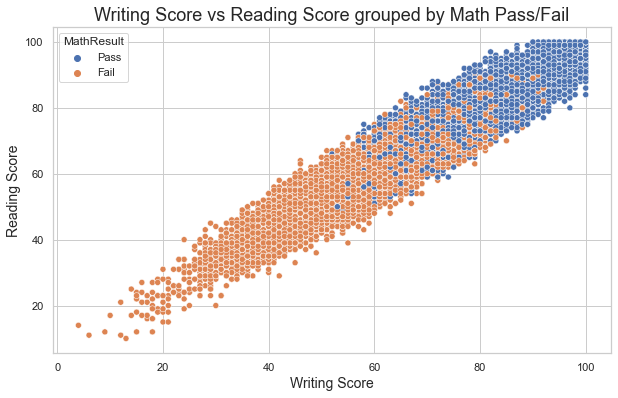

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Set the size of the plot
sns.scatterplot(x='WritingScore', y='ReadingScore',hue="MathResult", data=df)

plt.title('Writing Score vs Reading Score grouped by Math Pass/Fail', fontsize=18)  # Add a title
plt.xlabel('Writing Score', fontsize=14)  # Label the x-axis
plt.ylabel('Reading Score', fontsize=14)  # Label the y-axis

plt.show()

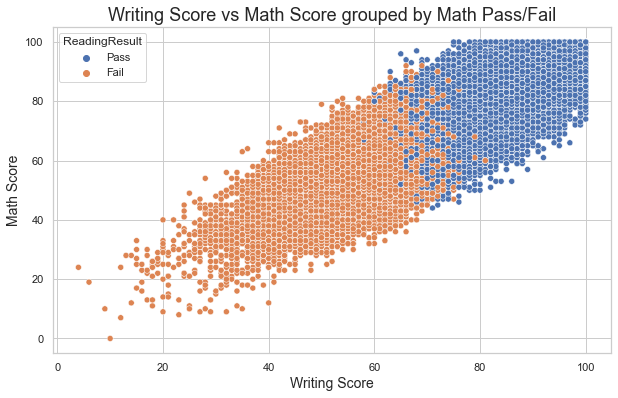

In [111]:
plt.figure(figsize=(10, 6))  # Set the size of the plot
sns.scatterplot(x='WritingScore', y='MathScore',hue="ReadingResult", data=df)

plt.title('Writing Score vs Math Score grouped by Math Pass/Fail', fontsize=18)  # Add a title
plt.xlabel('Writing Score', fontsize=14)  # Label the x-axis
plt.ylabel('Math Score', fontsize=14)  # Label the y-axis

plt.show()

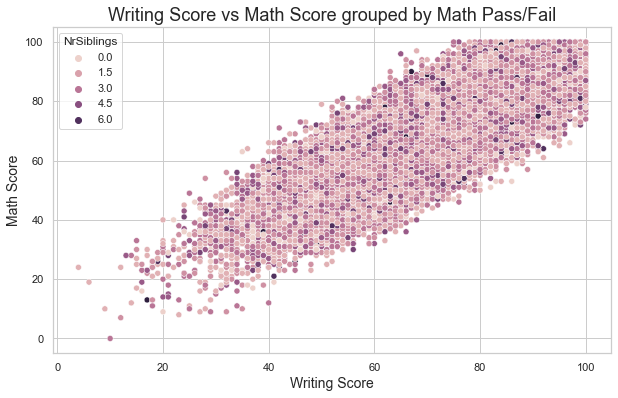

In [113]:
plt.figure(figsize=(10, 6))  # Set the size of the plot
sns.scatterplot(x='WritingScore', y='MathScore',hue="NrSiblings", data=df)

plt.title('Writing Score vs Math Score grouped by Math Pass/Fail', fontsize=18)  # Add a title
plt.xlabel('Writing Score', fontsize=14)  # Label the x-axis
plt.ylabel('Math Score', fontsize=14)  # Label the y-axis

plt.show()

In [75]:
unlabeled_df = num_df.rename(columns={'MathScore': 'Num1', 'ReadingScore': 'Num2', 'WritingScore': 'Num3'})


In [76]:
unlabeled_df.head()

,Num1,Num2,Num3
0,71,71,74
1,69,90,88
2,87,93,91
3,45,56,42
4,76,78,75


In [15]:
unlabeled_df.count()

Num1    30641
Num2    30641
Num3    30641
dtype: int64

### Math vs Reading Dataframe

In [53]:
math_read_df = unlabeled_df[["Num1","Num2"]]

## Business Understanding [↑](#toc)
<a class="anchor" id="understand"></a>

## Data Understanding [↑](#toc)
<a class="anchor" id="data"></a>

## Models and Evaluations using Cluster Analysis [↑](#toc)
<a class="anchor" id="cluster"></a>

### Clsuter Analysis: Kmeans

### Elbow Graph

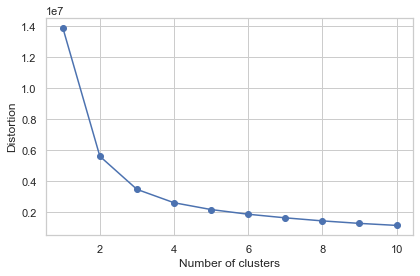

In [54]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                random_state=0)
    km.fit(math_read_df)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

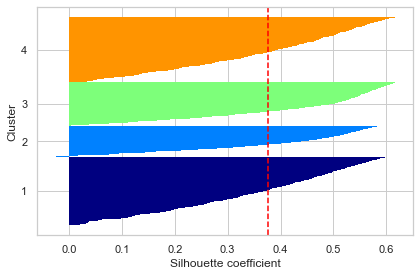

In [55]:
import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

km = KMeans(n_clusters=4, 
            init='k-means++', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=0)
y_km = km.fit_predict(math_read_df)

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(math_read_df, y_km, metric='euclidean')
y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, 
             edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
    
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color="red", linestyle="--") 

plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')

plt.tight_layout()
plt.show()

### KMeans Grid Search

In [56]:
#Define Parameter List
param_grid = {'n_clusters':[2,3,4],
             "n_init": [10,15,20] }

#Create KMeans Object
kmeans = KMeans(init='k-means++')

#Set Grid Search, the Grid Search uses Negative Inertia (Default Behavior in Sklearn's KMeans)
grid_search = GridSearchCV(kmeans, param_grid)

grid_search.fit(math_read_df)


GridSearchCV(estimator=KMeans(),
             param_grid={'n_clusters': [2, 3, 4], 'n_init': [10, 15, 20]})

In [57]:
# Print the best parameters
print("Best parameters: ", grid_search.best_params_)

# Print the best score (which will be negative inertia)
print("Best Score: ", grid_search.best_score_)

print("Best inertia: ", grid_search.best_estimator_.inertia_)


Best parameters:  {'n_clusters': 4, 'n_init': 15}
Best Score:  -520147.8161791073
Best inertia:  2600947.3919500113


### K-Mean Consistentcy Cluster using the Best Params

In [58]:
kmeans = KMeans(
    init='k-means++',    # initialization
    n_clusters=4,    # number of clusters
    n_init=15)         # number of different times to run k-means

kmeans.fit(math_read_df)

KMeans(n_clusters=4, n_init=15)

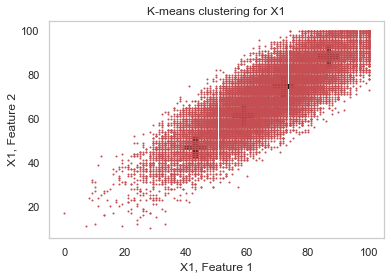

In [60]:
# visualize the data
unlabeled_np = math_read_df.values

# visualize the data
centroids = kmeans.cluster_centers_
plt.plot(unlabeled_np[:, 0], unlabeled_np[:, 1], 'r.', markersize=2) #plot the data
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='+', s=500, linewidths=5, color='k')  # plot the centroids
plt.title('K-means clustering for X1')
plt.xlabel('X1, Feature 1')
plt.ylabel('X1, Feature 2')
plt.grid()
plt.show()


### KMeans MiniBatch Grid Search

In [61]:
import warnings
warnings.filterwarnings('ignore')

#Define Parameter List
param_grid = {'n_clusters':[2,3,4],
             "batch_size": [10,15,20] }

#Create KMeans Minivatch Object
kmeans_mini = MiniBatchKMeans()

#Set Grid Search, the Grid Search uses Negative Inertia (Default Behavior in Sklearn's KMeans)
grid_search = GridSearchCV(kmeans_mini, param_grid,verbose=0)

grid_search.fit(math_read_df)


GridSearchCV(estimator=MiniBatchKMeans(),
             param_grid={'batch_size': [10, 15, 20], 'n_clusters': [2, 3, 4]})

In [62]:
# Print the best parameters
print("Best parameters: ", grid_search.best_params_)

# Print the best score (which will be negative inertia)
print("Best Score: ", grid_search.best_score_)

print("Best inertia: ", grid_search.best_estimator_.inertia_)

Best parameters:  {'batch_size': 10, 'n_clusters': 4}
Best Score:  -531730.4408441121
Best inertia:  2617585.449277669


In [64]:
print("Kmeans Inertia is: 2600947.3919500113")
print("KMiniBatch is: 2617585.449277669")
print("Kmeans Inertia is the better of the two with a smaller SSE.")


Kmeans Inertia is: 2600947.3919500113
KMiniBatch is: 2617585.449277669
Kmeans Inertia is the better of the two with a smaller SSE.


### DBSCAN

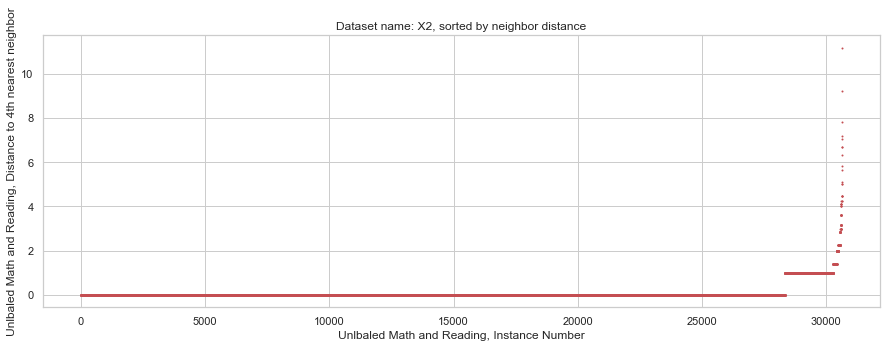

In [67]:
# lets first look at the connectivity of the graphs and distance to the nearest neighbors
from sklearn.neighbors import kneighbors_graph

N = 4

# create connectivity graphs before calcualting the hierarchy
X2_knn_graph = kneighbors_graph(math_read_df, N, mode='distance') # calculate distance to four nearest neighbors

N2 = X2_knn_graph.shape[0]
X2_4nn_distances = np.zeros((N2,1))
for i in range(N2):
    X2_4nn_distances[i] = X2_knn_graph[i,:].max()

X2_4nn_distances = np.sort(X2_4nn_distances, axis=0)


plt.figure(figsize=(15,5))
plt.plot(range(N2), X2_4nn_distances, 'r.', markersize=2) #plot the data
plt.title('Dataset name: X2, sorted by neighbor distance')
plt.xlabel('Unlbaled Math and Reading, Instance Number')
plt.ylabel('Unlbaled Math and Reading, Distance to {0}th nearest neighbor'.format(4))

plt.show()

### Grid Search #1 for DBScan

In [72]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Assuming X is your data
X = math_read_df

# Define the parameter space
eps_values = [1.2, 1.3, 1.4, 1.5, 2]  # example values
min_samples_values = [2, 3, 4, 10, 15]  # example values

best_score = -1
best_eps = None
best_min_samples = None

# Iterate over all combinations of eps_values and min_samples_values
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        
        # Perform clustering
        labels = dbscan.fit_predict(X)
        
        # Ignore bad fits
        if len(set(labels)) > 1:  
            score = silhouette_score(X, labels)
            
            # Save parameters if better than previous best
            if score > best_score:
                best_eps = eps
                best_min_samples = min_samples
                best_score = score

print("Best eps =", best_eps)
print("Best min_samples =", best_min_samples)
print("Best score =", best_score)


Best eps = 2
Best min_samples = 10
Best score = 0.47376297565496267


In [80]:
dbscan_param= {'eps': [1.2, 1.3, 1.4, 1.5, 2],
                    'min_samples': [2, 3, 4, 10, 15],}

def custom_silhouette_score(estimator, math_read_df):
    labels = estimator.fit_predict(math_read_df)
    return silhouette_score(math_read_df, labels)

#Create DBSCAN Object
ca = DBSCAN()

#Set Grid Search, the Grid Search uses Negative Inertia (Default Behavior in Sklearn's KMeans)
grid_search = GridSearchCV(ca, dbscan_param, scoring=custom_silhouette_score,verbose=0)

grid_search.fit(math_read_df)

print("Best parameters X3:", grid_search.best_params_)

Best parameters X3: {'eps': 2, 'min_samples': 15}


In [81]:
print("Best Score: ", -grid_search.best_score_)


Best Score:  -0.26716298479369516


### Visualize DBSCAN

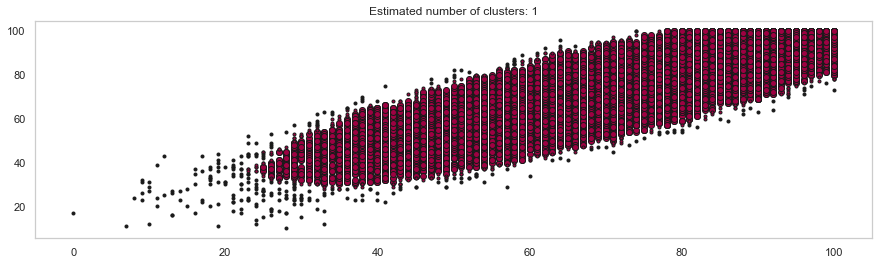

In [87]:
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt

# Perform DBSCAN on the data
db = DBSCAN(eps=2, min_samples=15).fit(math_read_df)
labels = db.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# mark the samples that are considered "core"
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

# Define the figure size
plt.figure(figsize=(15,4))

# Get the unique labels and colors for each label
unique_labels = set(labels) # the unique labels
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))

data = math_read_df.values  # Get a numpy array version of your DataFrame

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = data[class_member_mask & core_samples_mask]
    # plot the core points in this class
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
            markeredgecolor='k', markersize=6)

    # plot the remaining points that are edge points
    xy = data[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
                 markeredgecolor='k', markersize=3)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.grid()
plt.show()


### Guassian Mixture

### GridSearch

In [92]:
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer

# Assuming X is your data
X = math_read_df

# Custom scorer for BIC
def bic_scorer(estimator, X):
    return -estimator.bic(X)  # Returns negative BIC because GridSearchCV maximizes the score

# Define the parameter space
param_grid = {'n_components': range(1, 5), 'covariance_type': ['full', 'tied', 'diag', 'spherical']}

# Create a GaussianMixture object
gmm = GaussianMixture()

# Create the grid search object
grid_search = GridSearchCV(gmm, param_grid, scoring=bic_scorer, cv=KFold(5))

# Perform the grid search
grid_search.fit(X)

# Print the best parameters
print("Best parameters: ", grid_search.best_params_)

# Print the best score (which will be the negative of BIC, because GridSearchCV always tries to maximize the score)
print("Best score (negative BIC): ", grid_search.best_score_)

# Convert the score back to positive, because lower BIC is better
print("Best BIC: ", -grid_search.best_score_)


Best parameters:  {'covariance_type': 'tied', 'n_components': 2}
Best score (negative BIC):  -94526.04564299877
Best BIC:  94526.04564299877


In [93]:
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer

# Assuming X is your data
X = math_read_df

# Custom scorer for AIC
def aic_scorer(estimator, X):
    return -estimator.aic(X)

# Define the parameter space
param_grid = {'n_components': range(1, 5), 'covariance_type': ['full', 'tied', 'diag', 'spherical']}

# Create a GaussianMixture object
gmm = GaussianMixture()

# Create the grid search object
grid_search = GridSearchCV(gmm, param_grid, scoring=aic_scorer, cv=KFold(5))

# Perform the grid search
grid_search.fit(X)

# Print the best parameters
print("Best parameters: ", grid_search.best_params_)

# Print the best score (which will be the negative of AIC, because GridSearchCV always tries to maximize the score)
print("Best score (negative AIC): ", grid_search.best_score_)

# Convert the score back to positive, because lower AIC is better
print("Best AIC: ", -grid_search.best_score_)


Best parameters:  {'covariance_type': 'full', 'n_components': 3}
Best score (negative AIC):  -94439.55650256334
Best AIC:  94439.55650256334


### Visualize Final Results for GMM

In [96]:
# create an instance of the GaussianMixture class; set number of clusters to 2
gmm = GaussianMixture(n_components=2, covariance_type="tied")

# fit the gmm model
gmm.fit(X)

# get the cluster labels
labels = gmm.predict(X)
labels


array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

In [98]:
print('means:', gmm.means_)
print('\n')
print('variances:', gmm.covariances_)
print('\n')
print('weights:', gmm.weights_)
print('\n')
print('first five posterior_prob:\n', gmm.predict_proba(X)[:5].round(3))

means: [[56.00851416 59.07103918]
 [75.68922837 78.29770462]]


variances: [[139.64234008  91.3054965 ]
 [ 91.3054965  125.8838534 ]]


weights: [0.46394791 0.53605209]


first five posterior_prob:
 [[0.317 0.683]
 [0.08  0.92 ]
 [0.016 0.984]
 [0.937 0.063]
 [0.138 0.862]]


### Compare All Models

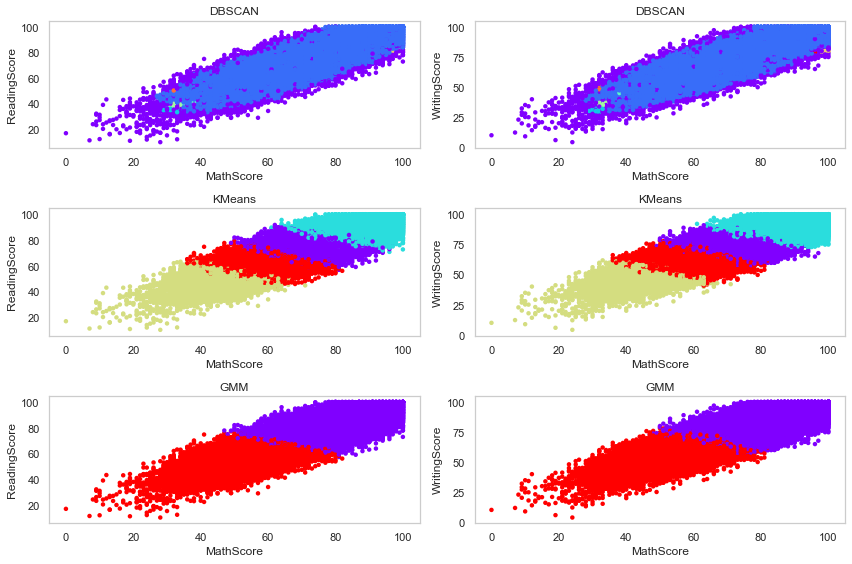

In [105]:
from sklearn.cluster import DBSCAN, KMeans
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import numpy as np

data = num_df

cls = DBSCAN(eps=2, min_samples=10)
cls.fit(data)
dbs_labels = cls.labels_ 

cls = KMeans(init="k-means++",n_clusters=4,n_init=15,random_state=1)
cls.fit(data)
kmn_labels = cls.labels_

cls = GaussianMixture(n_components=2, covariance_type="tied")
cls.fit(data)
gmm_labels = cls.predict(data)  # Correct way to get labels for GaussianMixture

fig = plt.figure(figsize=(12,8))
title = ['DBSCAN','KMeans','GMM']

# assuming 'Feature1' and 'Feature2' are names of your columns
for i,l in enumerate([dbs_labels, kmn_labels, gmm_labels]):
    
    plt.subplot(3,2,2*i+1)
    plt.scatter(data['MathScore'], data['ReadingScore']+np.random.random(data['ReadingScore'].shape)/2, c=l, cmap=plt.cm.rainbow, s=20, linewidths=0)
    plt.xlabel('MathScore'), plt.ylabel('ReadingScore')
    plt.grid()
    plt.title(title[i])
    
    plt.subplot(3,2,2*i+2)
    plt.scatter(data['MathScore'], data['WritingScore']+np.random.random(data['WritingScore'].shape)/2, c=l, cmap=plt.cm.rainbow, s=20, linewidths=0)
    plt.xlabel('MathScore'), plt.ylabel('WritingScore')
    plt.grid()
    plt.title(title[i])
    
plt.tight_layout()
plt.show()
